## Week 7 Lab (Naive Bayes)
### COSC 3337 Dr. Rizk

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

Our first step is to load the data into a pandas DataFrame. For some reason, this dataset did not come with a header/column names, so we will specify that when loading the data and manually add the column names ourselves.

In [3]:
adult_df = pd.read_csv('adult.csv', header=None)
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
                    'relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
                    'income']
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Calling **.info()** we can see that there are no missing values in our dataset since there are 32561 entries in total, and 32561 non-null entries in every column.

In [4]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


When working with a lot of variables, it's usually a good idea to keep track of your categorical and numerical columns in a separate array so that way we can easilly index our dataframe by that array if for some reason we only want to work with the numerical columns. For example, when calculating correlations we only want to work with the numerical columns else we will get an error.

In [5]:
categoricals = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
                'native_country', 'income']
numericals = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

Now we can easily explore just categorical or numericals at a time. 😊 Let's begin exploring the categorical variables first.

In [6]:
adult_df[categoricals].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


Does one sex tend to earn more than the other in this dataset?

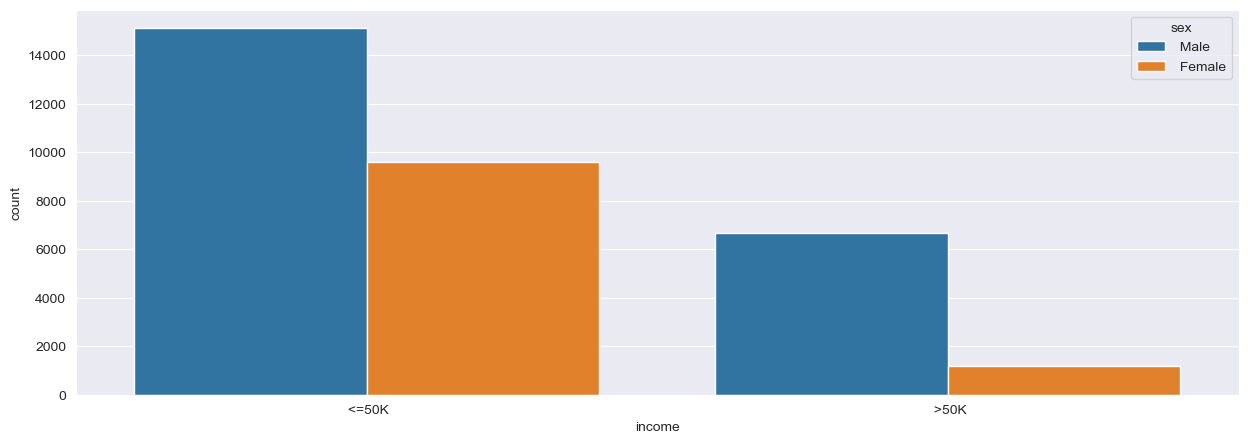

In [7]:
sns.countplot(x=adult_df['income'], hue='sex', data=adult_df)
plt.show()

Interpretation: majority of our dataset consist of people earning <=50k, but we can see that in both categories (<=50k and >50k), majority of the men earn more.

What's the most common education people in our dataset have?

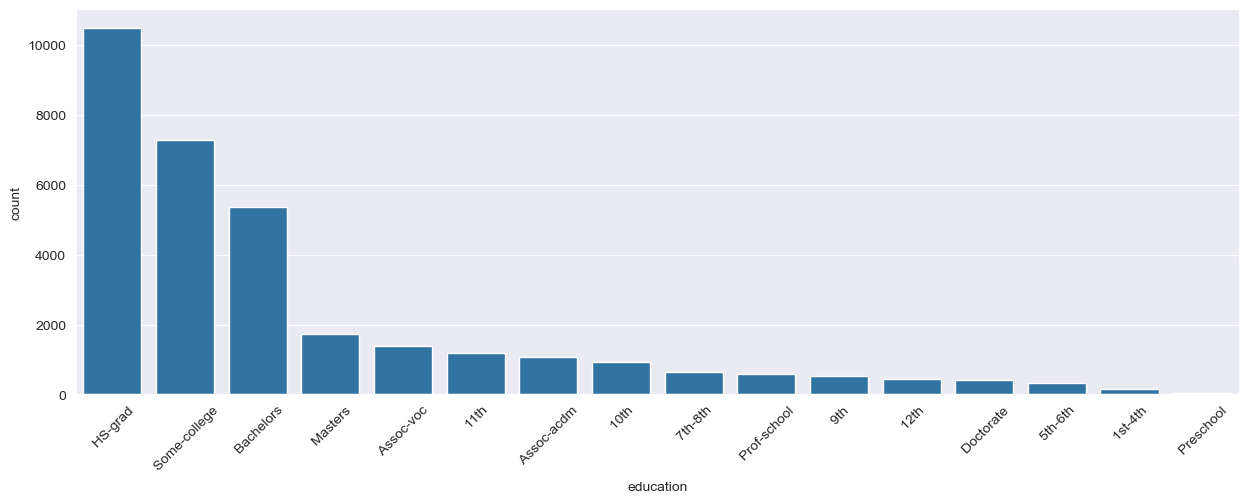

In [8]:
# order= is an optional parameter, which is just sorting the bars in this case.
sns.countplot(x=adult_df['education'], order=adult_df['education'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

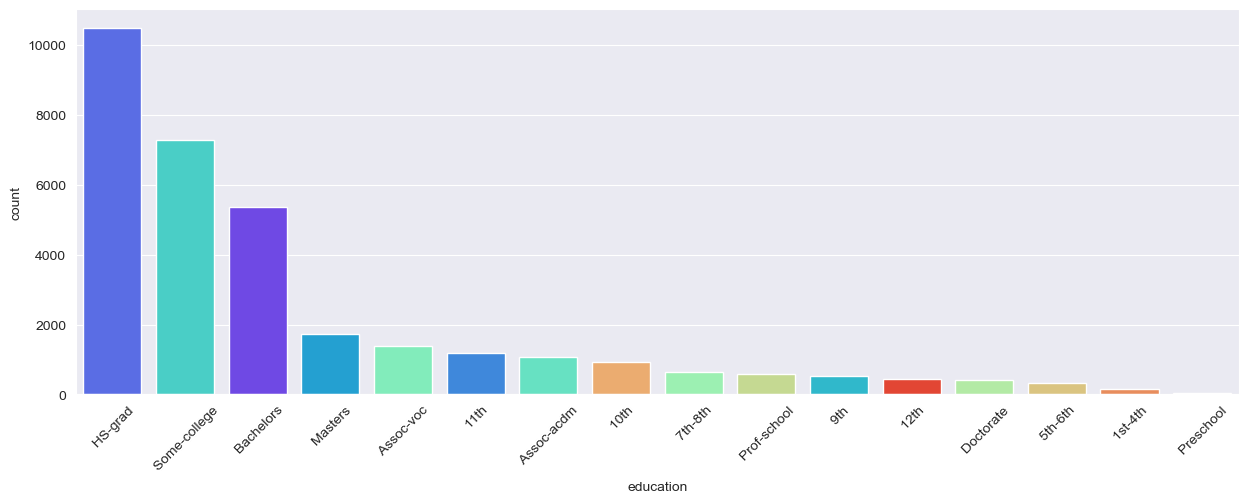

In [9]:
# order= is an optional parameter, which is just sorting the bars in this case.
sns.countplot(x=adult_df['education'], order=adult_df['education'].value_counts().index, palette = 'rainbow', hue = adult_df['education'])
plt.xticks(rotation=45)
plt.show()

Interpretation: high school, some college, and bachelors degrees seem to be most common in our dataset.

Let's see how many counts of each race we have in this dataset

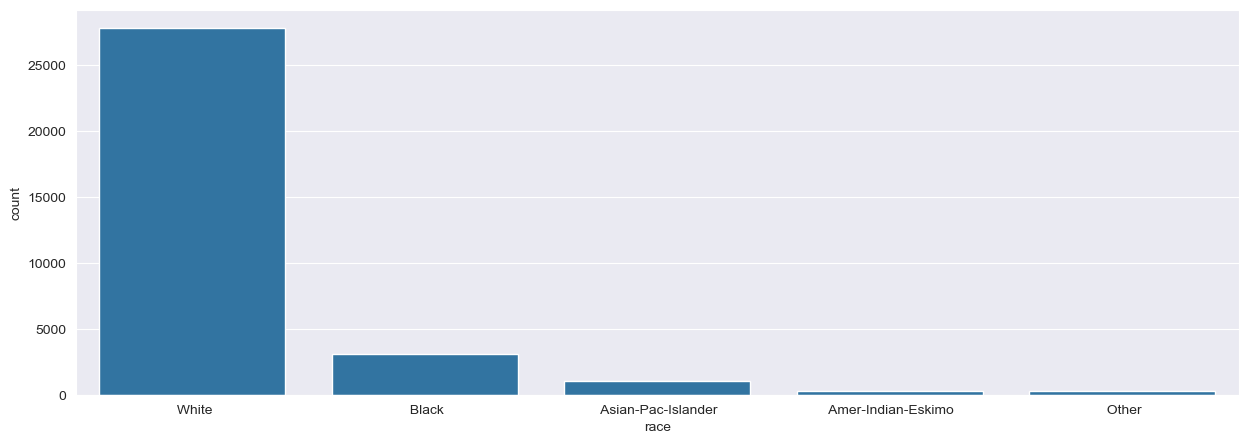

In [10]:
sns.countplot(x=adult_df['race'], data=adult_df)
plt.show()

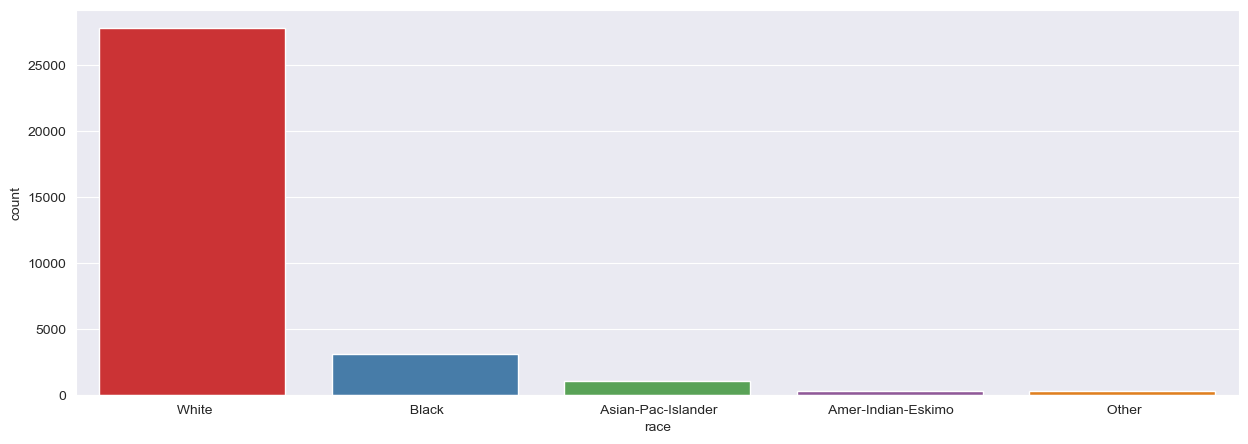

In [11]:
sns.countplot(x=adult_df['race'], data=adult_df, palette = 'Set1', hue = adult_df['race'])
plt.show()

Interpretation: our dataset mostly consists of people from the white race category. Thus, inferences based on race from this dataset could be biased since we do not have enough data from other race categories.

What sort of occupations do we have in our dataset, and which are most common?

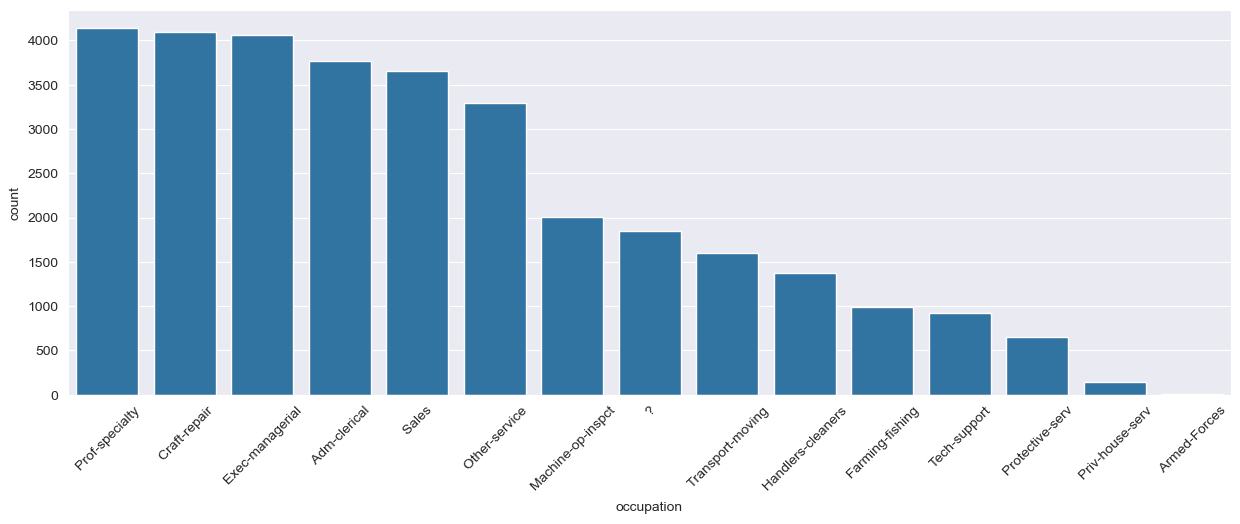

In [12]:
sns.countplot(x=adult_df['occupation'], data=adult_df, order=adult_df['occupation'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

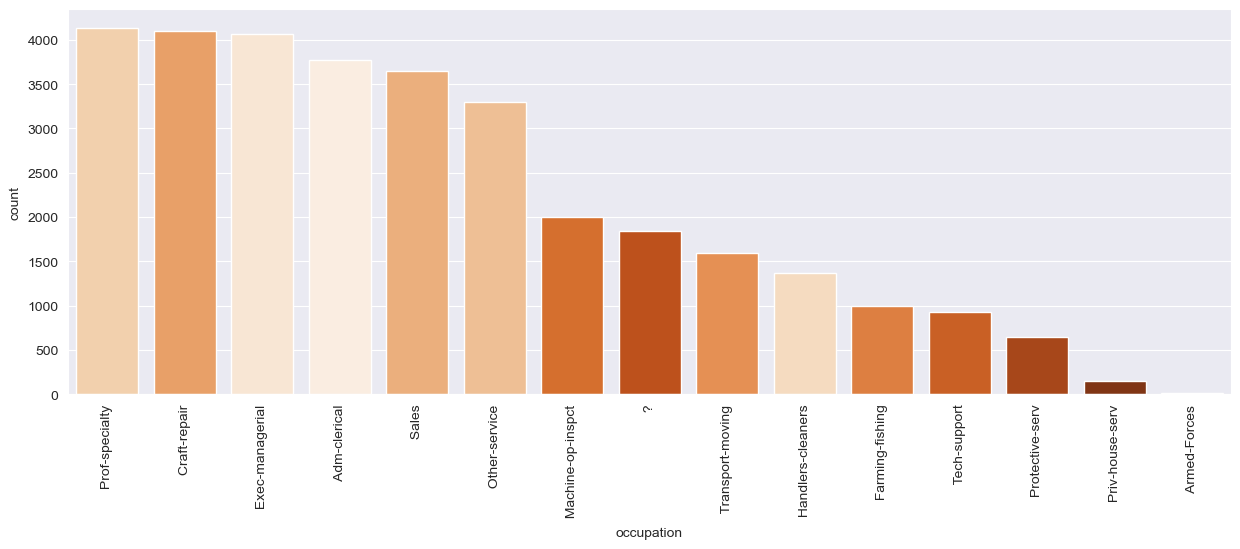

In [13]:
sns.countplot(x=adult_df['occupation'], data=adult_df, order=adult_df['occupation'].value_counts().index, palette = 'Oranges', hue = adult_df['occupation'])
plt.xticks(rotation=90)
plt.show()

Interpretation: Prof-specialty, craft-repair, and Exec-managerial are the top 3 occupations in our dataset. Also, there's a '?' signifying unknown. We'll have to make sure to replace those question marks with null/nan values since these should really be missing values. If you take a look, you'll see that workclass and native_country also have '?' values, so we'll replace those with NaN as follows:

In [14]:
adult_df['workclass'] = adult_df['workclass'].replace(' ?', np.NaN)
adult_df['occupation'] = adult_df['occupation'].replace(' ?', np.NaN)
adult_df['native_country'] = adult_df['native_country'].replace(' ?', np.NaN)

**Note: There was a small space infront of the question mark, so make sure to include that if you're using the same dataset.**

After running the cell above, we can see that we have the following missing values, which we'll have to take care of.

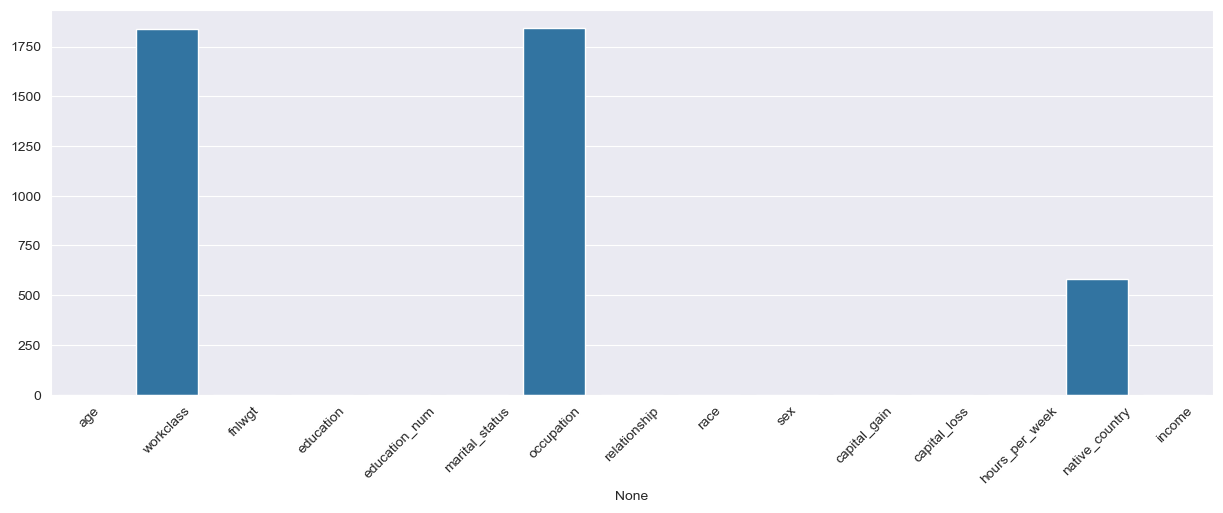

In [15]:
sns.barplot(x=adult_df.columns, y=adult_df.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()

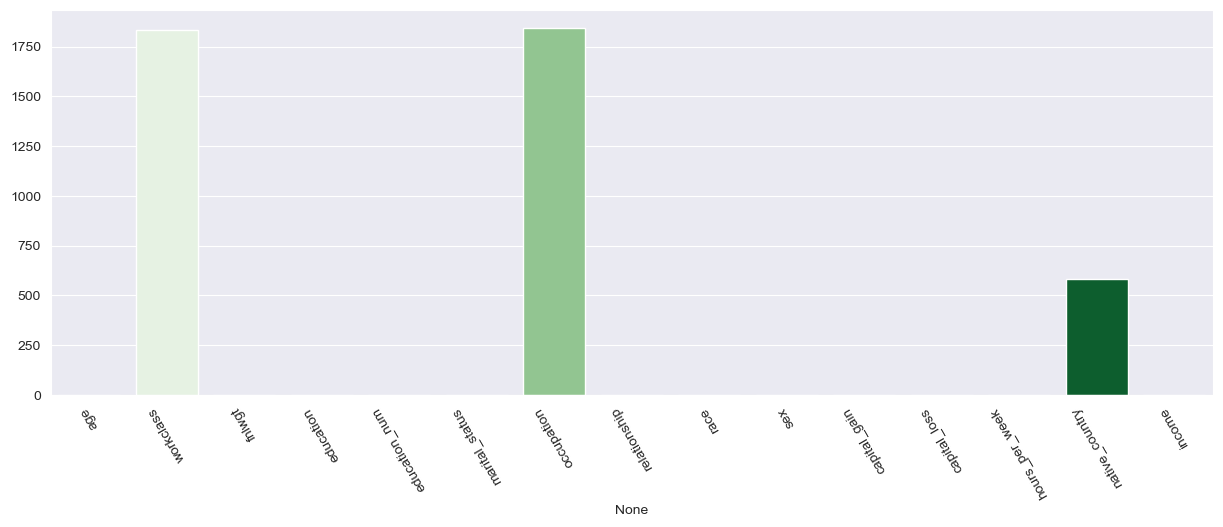

In [16]:
sns.barplot(x=adult_df.columns, y=adult_df.isnull().sum().values, palette = 'Greens', hue = adult_df.columns)
plt.xticks(rotation=120)
plt.show()

In [17]:
adult_df[numericals].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [18]:
adult_df[numericals].tail()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20
32560,52,287927,9,15024,0,40


Let's check if there are any '?' missing values in any of the numerical columns like we had in the categoricals. We can do this by looping through every variable in the numericals list and printing a note if that column contains a ' ?'.

In [19]:
for variable in numericals:
    if not adult_df[adult_df[variable] == ' ?'].empty:
        print(f'{variable} contains missing values ( ?)')

In [20]:
for variable in numericals:
    if adult_df[adult_df[variable] == '?'].empty: # changing the coditions 
        print(f'{variable} contains missing values (no empty values)')

age contains missing values (no empty values)
fnlwgt contains missing values (no empty values)
education_num contains missing values (no empty values)
capital_gain contains missing values (no empty values)
capital_loss contains missing values (no empty values)
hours_per_week contains missing values (no empty values)


Great, there are no missing vlaues to take care of here, we'll just have to take care of the categorical missing values in later.

What do the distributions of our numerical variables look like?

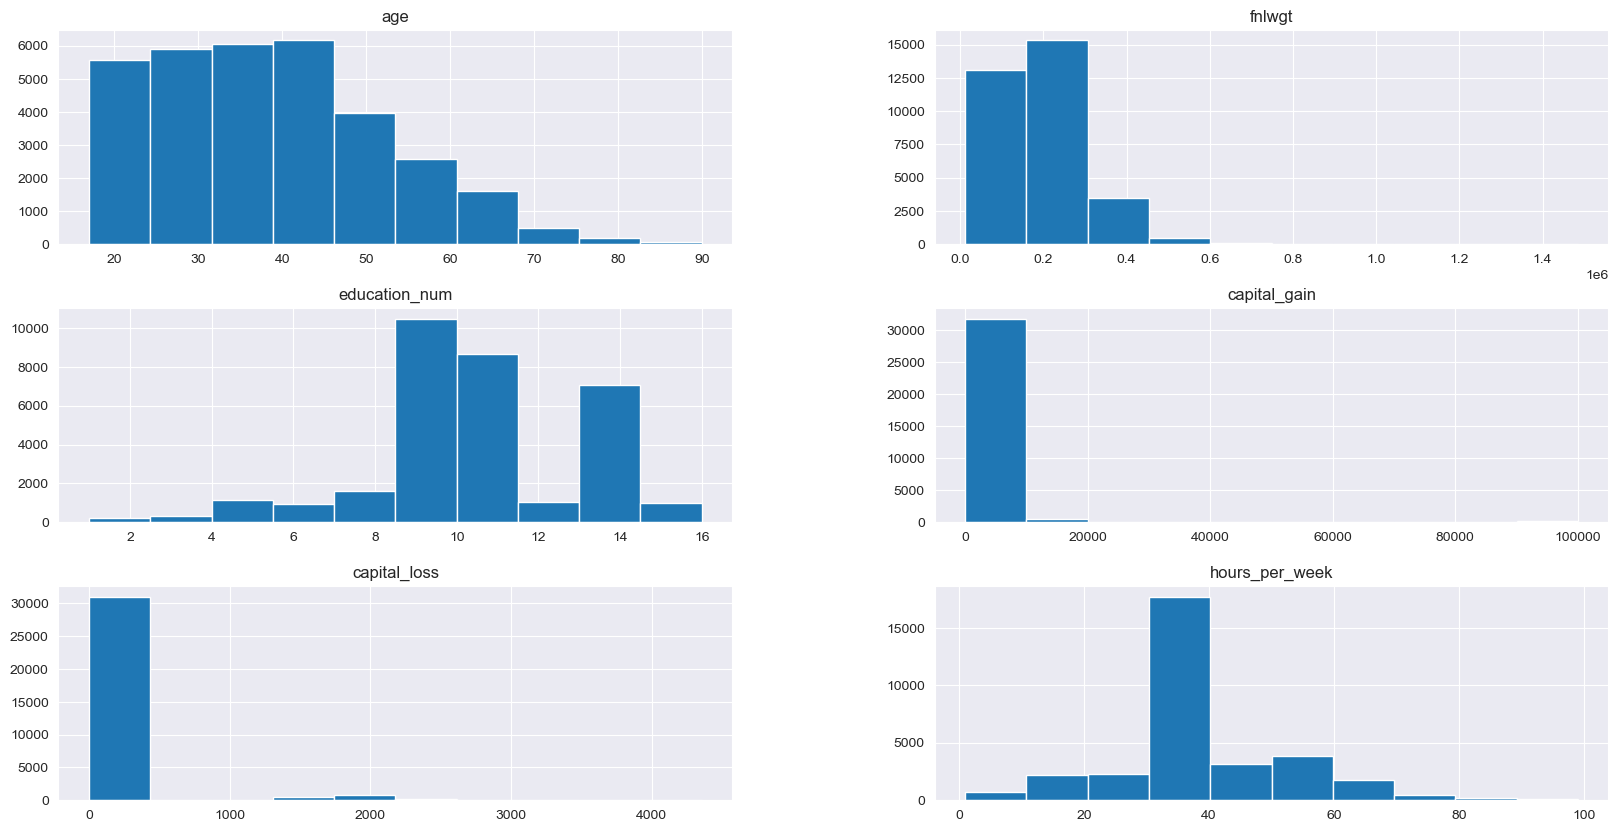

In [21]:
adult_df[numericals].hist(figsize=(20, 10))
plt.show()

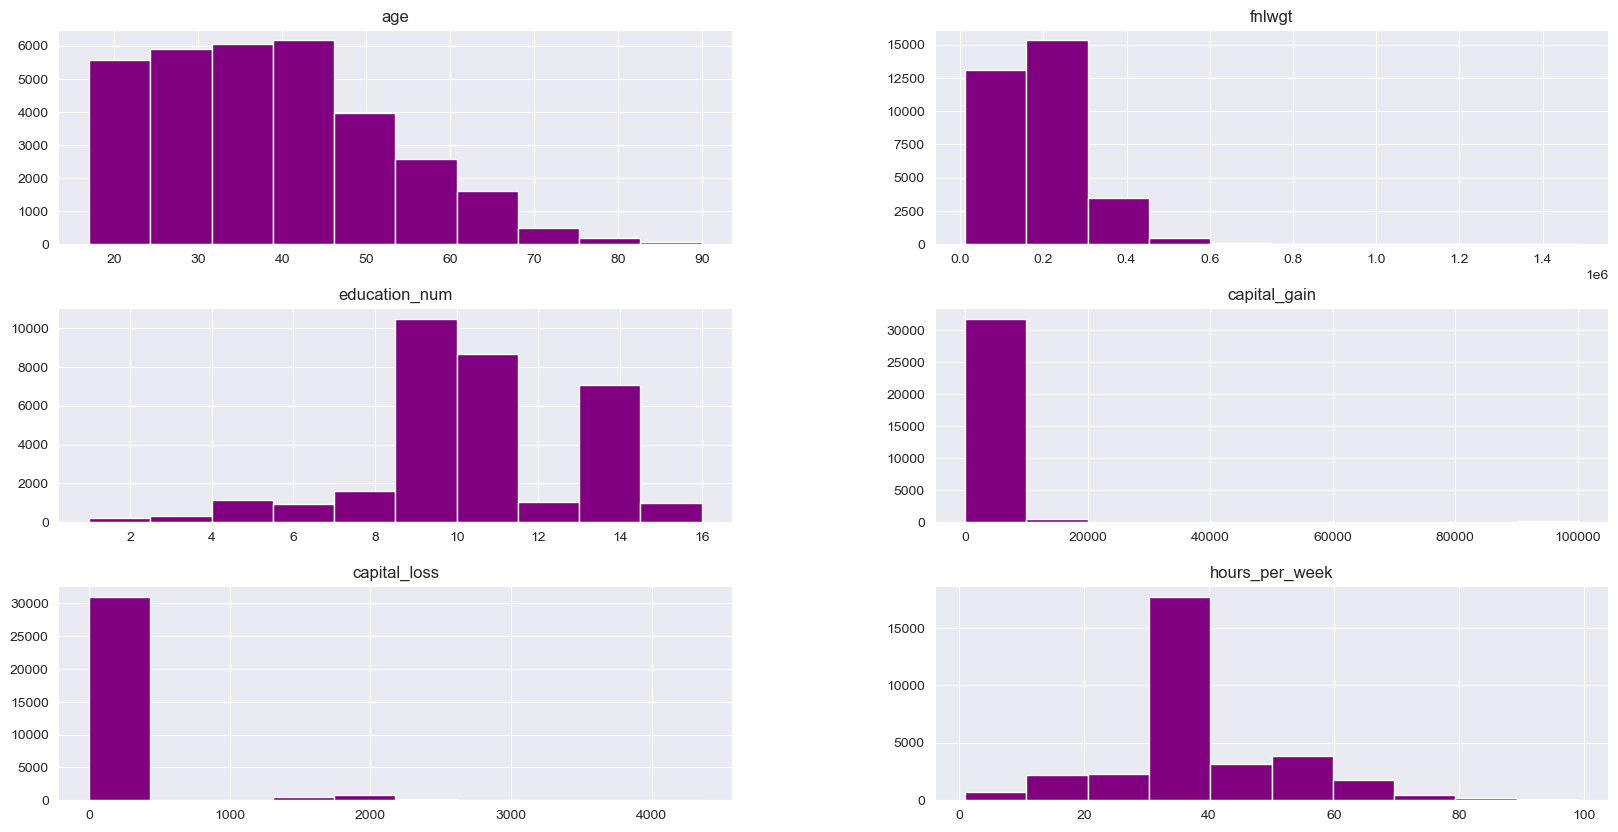

In [22]:
adult_df[numericals].hist(figsize=(20, 10), color = 'purple')
plt.show()

I encourage you to go ahead and explore the dataset some more to see if you can find some more interesting points, but I'll jump to the pre-processing now since you should be comfortable exploring datasets by now, and the main goal of this lab is to learn how to create and evaluate a Naive Bayes model in sklearn.

## Pre-Processing
We'll first take care of the missing categorical values. One option is to replace the missing values with the most frequent/mode, which we'll do below. However, options for dealing with missing **categorical variables** include:

* Remove observations with missing values if we are dealing with a large dataset and the number of records containing missing values are few.
* Remove the variable/column if it is not significant.
* Develop a model to predict missing values. KNN for example.
* Replace missing values with the most frequent in that column.

In [23]:
adult_df['workclass'].fillna(adult_df['workclass'].mode()[0], inplace=True)
adult_df['occupation'].fillna(adult_df['occupation'].mode()[0], inplace=True)
adult_df['native_country'].fillna(adult_df['native_country'].mode()[0], inplace=True)

Our next step is to encode these categories. Since our categories don't really have any type of order to preserve, we'll use one hot encoding / get dummies. Refer back to lab 5 if you're having trouble using dummy variables, but we'll encode as follows:

In [24]:
adult_df = pd.get_dummies(data=adult_df, columns=categoricals, drop_first=True)

In [25]:
adult_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
adult_df.tail()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
32556,27,257302,12,0,0,38,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
32557,40,154374,9,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
32558,58,151910,9,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
32559,22,201490,9,0,0,20,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
32560,52,287927,9,15024,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True


Let's now map all of our variables onto the same scale. We'll follow the same steps as the KNN lab. The only difference from KNN lab is that here we're using RobustScaler, which just scales features using statistics that are robust to outliers.

In [27]:
from sklearn.preprocessing import RobustScaler

# all columns except our target column for X
X = adult_df.drop('income_ >50K', axis=1)
y = adult_df['income_ >50K']

# create our scaler object
scaler = RobustScaler()
# use our scaler object to transform/scale our data and save it into X_scaled. Only need to
# transform numerical data.
X_scaled = scaler.fit_transform(X[numericals])
# reassign X[numericals] to the transformed numerical data.
X[numericals] = X_scaled

In [28]:
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.10,-0.845803,1.000000,2174.0,0.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.65,-0.797197,1.000000,0.0,0.0,-5.4,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.05,0.312773,-0.333333,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,0.80,0.472766,-1.000000,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,-0.45,1.342456,1.000000,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
X.tail()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
32556,-0.50,0.662165,0.666667,0.0,0.0,-0.4,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
32557,0.15,-0.201151,-0.333333,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
32558,1.05,-0.221818,-0.333333,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
32559,-0.75,0.194038,-0.333333,0.0,0.0,-4.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
32560,0.75,0.919035,-0.333333,15024.0,0.0,0.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


## Creating our Model
We're now ready to begin creating and training our model. We first need to split our data into training and testing sets. This can be done using sklearn's **train_test_split(X, y, test_size)** function. This function takes in your features (X), the target variable (y), and the test_size you'd like (Generally a test size of around 0.3 is good enough). It will then return a tuple of X_train, X_test, y_train, y_test sets for us. We will train our model on the training set and then use the test set to evaluate the model.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
# # what if
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [32]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model to train a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

## Model Evaluation
Now that we've finished training, we can make predictions off of the test data and evaluate our model's performance using the corresponding test data labels (y_test)

In [33]:
y_pred = gnb.predict(X_test)

Check accuracy score:

In [34]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8256


In [35]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.8f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.82557068


Compare the train set and test set accuracy:

In [36]:
y_pred_train = gnb.predict(X_train)

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8220
Test set score: 0.8256


In [37]:
y_pred_train = gnb.predict(X_train)

print('Training set score: {:.8f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.8f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.82195507
Test set score: 0.82557068


The training set accuracy score is 0.8241 while the test set accuracy is 0.8228. These two values are quite comparable, so there is no sign of overfitting.

Confussion matrix results:



In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6296 1099]
 [ 605 1769]]

True Positives(TP) =  6296

True Negatives(TN) =  1769

False Positives(FP) =  1099

False Negatives(FN) =  605


Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. Let's print these as well.

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.85      0.88      7395
        True       0.62      0.75      0.67      2374

    accuracy                           0.83      9769
   macro avg       0.76      0.80      0.78      9769
weighted avg       0.84      0.83      0.83      9769



In [40]:
# manually calculating
Precision = cm[0,0]/(cm[0,0]+cm[0,1])
Recall = cm[0,0]/(cm[0,0]+cm[1,0])
F1 = 2*Precision*Recall/(Precision+Recall)
print(f'Precision: {Precision}, Recall: {Recall}, F1: {F1}') #its calculating F1 correctly

Precision: 0.8513860716700473, Recall: 0.9123315461527315, F1: 0.8808058198097369


Let's also perform k-Fold Cross Validation (10-fold below). We can do this using **cross_val_score(model, X_train, y_train, k, scoring)**

In [41]:
from sklearn.model_selection import cross_val_score

# Applying 10-Fold Cross Validation
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

# compute Average cross-validation score
print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.81842105 0.81052632 0.83018868 0.81921896 0.82492321 0.82053532
 0.82887231 0.81175954 0.82667837 0.82667837]

Average cross-validation score: 0.8218


In [42]:
from sklearn.model_selection import cross_val_score

# Applying 10-Fold Cross Validation
scores = cross_val_score(gnb, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

# compute Average cross-validation score
print('\nAverage cross-validation score: {:.8f}'.format(scores.mean()))

Cross-validation scores:[0.81618776 0.82693573 0.82207108 0.8214129  0.8255814 ]

Average cross-validation score: 0.82243777


interpretation:

* Using the mean cross-validation, we can conclude that we expect the model to be around 0.8236% accurate on average.

* If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, so we can conclude that the model is independent of the particular folds used for training.

Great job! You now know how to use a Naive Bayes model in sklearn. 🙂 Try using this on your own dataset and refer back to this lecture if you get stuck.